# Energy Minimization - Sensitivity Analysis

The objective here is to minimize the total energy via the process of sensitivity analysis. In other words, we will vary the weights of each of the energy terms, while keeping the sum total weights constant, so that we return the lowest value of total energy.

Here we apply the metaheuristic, a __genetic algorithm__, to solve the energy minimization problem by redistributing the weights such that the total energy equation is minimized.

## Incomplete, but working Genetic Algorithm

This code can be made much more efficient by using the subroutines involved in a genetic algorithm:
* mutation
* crossover
* tournament selection

However, this piece of code __does work__ as a kind of heuristic to this problem. If you change the value of *end* to a higher value, you will eventually reach the solution with enough accuracy.

The original energy before applying the genetic algorithm was as follows [-267.028]


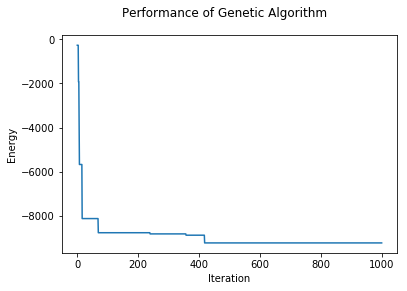


Here are the weights for the following energy terms...

 bond = 0.0012567322834458005
 angle = 0.027348913485535656
 dihed = 0.004737949690299976
 nb = 0.016683758322226117
 eel = 0.0010299427915463155
 vdw = 0.00013963294643267336
 el = 7.948617555215509
 egb = 0.0001855152650047393

This results in the following energy [-9231.54362193]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random as random

# initialize all the weights to 1
wb = 1
wa = 1
wd = 1
wn = 1
wee = 1
wv = 1
wel = 1
weg = 1

weights = [wb,wa,wd,wn,wee,wv,wel,weg]

# returns a vector describing all of the weights
def weights():
    return [wb,wa,wd,wn,wee,wv,wel,weg]

"""initialize energy terms"""

bond = 49.7829
angle = 138.4463
dihed = 217.8041
nb = 39.1752
eel = 695.8385
vdw = -83.5197
el = -1162.1836
egb = -162.3717

energy_terms = np.array([[bond], [angle], [dihed], [nb], [eel], [vdw], [el], [egb]])

# original weights of 1
original_energy = np.dot(np.ones(len(energy_terms)), energy_terms)
print('The original energy before applying the genetic algorithm was as follows', original_energy) 

last_energy = original_energy
end = 1000
list_total_energy = []

for a in range(end):

    population = []

    # random initialization of an attempt at the solution, an "individual"
    individual = []

    # total amount of weight left to be redistributed 
    total_weight_left = float(len(weights()))
    # print(total_weight_left)

    # distribute random weights to an individual, while keeping total weight constant
    for weight in (range(len(weights())-1)):    
        distribute = random.uniform(0,1) * total_weight_left
        total_weight_left -= distribute
        new_weight = distribute
        individual.append(new_weight)

    # add what's left to be distributed, as the final weight 
    individual.append(total_weight_left)

    # total weight is unchanged 
    # weights have been randomly distributed

    # randomly shuffle the weights in the list
    random.shuffle(individual)

    """matrix multiplication to computer total_energy"""

    np.array(individual)

    # calculate dot product of the arrays
    total_energy = np.dot(individual, energy_terms)

    if total_energy < last_energy:
        last_energy = total_energy
        best_weights = individual
        
    list_total_energy.append(last_energy)       

# plots the performance of the G.A.
plt.plot(range(end), list_total_energy)
plt.suptitle('Performance of Genetic Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

def print_weights_of(weights):
    print()
    print("Here are the weights for the following energy terms...")
    print()
    print(" bond =", weights[0])
    print(" angle =", weights[1])
    print(" dihed =", weights[2])
    print(" nb =", weights[3])
    print(" eel =", weights[4])
    print(" vdw =", weights[5])
    print(" el =", weights[6])
    print(" egb =", weights[7])
    print()
    
print_weights_of(best_weights)
print('This results in the following energy', last_energy)

## Discussion

As expected, the most negative energy term takes all the weight, thereby leaving the other energy terms with weights of 0.